## Milestone 2: Predictive Modeling
In this milestone, we will fully integrate the data and process it for machine learning. Below is a refined step-by-step plan for predictive modeling, including detailed descriptions and code for each step.

### 1. Load and Inspect the Data
#### What We'll Do
We will load the files into DataFrames and inspect their structure. This helps verify that features (df_X.csv) and the target variable (df_y.csv) are correctly aligned. We'll also reference the info.csv metadata to guide preprocessing decisions.

In [1]:
import pandas as pd

# Load features and target variable
df_X = pd.read_csv("df_X.csv")
df_y = pd.read_csv("df_y.csv")
info = pd.read_csv("info.csv")

# Inspect the data
print(df_X.head())
print(df_y.head())
print(info.head())  # Feature metadata
print(df_X.info())  # Summary of df_X
print(df_y.info())  # Summary of df_y

   Unnamed: 0  age           job  marital  education default  balance housing  \
0           0   58    management  married   tertiary      no     2143     yes   
1           1   44    technician   single  secondary      no       29     yes   
2           2   33  entrepreneur  married  secondary      no        2     yes   
3           3   47   blue-collar  married        NaN      no     1506     yes   
4           4   33           NaN   single        NaN      no        1      no   

  loan contact  day_of_week month  duration  campaign  pdays  previous  \
0   no     NaN            5   may       261         1     -1         0   
1   no     NaN            5   may       151         1     -1         0   
2  yes     NaN            5   may        76         1     -1         0   
3   no     NaN            5   may        92         1     -1         0   
4   no     NaN            5   may       198         1     -1         0   

  poutcome  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4  

### 2. Merge Features and Target Variable
#### What We'll Do
We will combine df_X and df_y into a single DataFrame. This ensures the target variable (y) is aligned with its respective features.

In [2]:
# Inspect df_X
print(df_X.head())
print(df_X.columns)

# Inspect df_y
print(df_y.head())
print(df_y.columns)

   Unnamed: 0  age           job  marital  education default  balance housing  \
0           0   58    management  married   tertiary      no     2143     yes   
1           1   44    technician   single  secondary      no       29     yes   
2           2   33  entrepreneur  married  secondary      no        2     yes   
3           3   47   blue-collar  married        NaN      no     1506     yes   
4           4   33           NaN   single        NaN      no        1      no   

  loan contact  day_of_week month  duration  campaign  pdays  previous  \
0   no     NaN            5   may       261         1     -1         0   
1   no     NaN            5   may       151         1     -1         0   
2  yes     NaN            5   may        76         1     -1         0   
3   no     NaN            5   may        92         1     -1         0   
4   no     NaN            5   may       198         1     -1         0   

  poutcome  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4  

In [3]:
import pandas as pd

# Load df_X and df_y
df_X = pd.read_csv("df_X.csv")
df_y = pd.read_csv("df_y.csv")

# Confirm DataFrames are loaded correctly
print(df_X.shape)  # Should show non-zero rows and columns
print(df_y.shape)  # Should show non-zero rows and columns

(45211, 17)
(45211, 2)


In [4]:
# Merge DataFrames on Unnamed: 0
df_X = df_X.merge(df_y, on='Unnamed: 0', how='inner')

# Inspect the merged DataFrame
print(df_X.shape)  # Check the number of rows and columns after the merge
print(df_X.head())  # Display the first few rows

(45211, 18)
   Unnamed: 0  age           job  marital  education default  balance housing  \
0           0   58    management  married   tertiary      no     2143     yes   
1           1   44    technician   single  secondary      no       29     yes   
2           2   33  entrepreneur  married  secondary      no        2     yes   
3           3   47   blue-collar  married        NaN      no     1506     yes   
4           4   33           NaN   single        NaN      no        1      no   

  loan contact  day_of_week month  duration  campaign  pdays  previous  \
0   no     NaN            5   may       261         1     -1         0   
1   no     NaN            5   may       151         1     -1         0   
2  yes     NaN            5   may        76         1     -1         0   
3   no     NaN            5   may        92         1     -1         0   
4   no     NaN            5   may       198         1     -1         0   

  poutcome   y  
0      NaN  no  
1      NaN  no  
2    

### 3. Preprocess the Data
#### What We'll Do:

**1. Convert the target variable (y) to binary format** (no = 0, yes = 1).

**2. Handle Missing Values:**

- Replace missing values in contact and poutcome with "unknown".

- Impute missing values in pdays with -1, which indicates "not previously contacted."

**3. Exclude Irrelevant Features:**

- Drop the duration column as it is not suitable for realistic predictions.

**4. Separate Numerical and Categorical Features:**

- Divide the dataset into numerical (e.g., age, balance) and categorical (e.g., job, education) features for more efficient processing.

Why? Proper preprocessing ensures the dataset is clean, consistent, and suitable for machine learning models. Categorical features need to be encoded, and numerical features need to be scaled for accurate predictions.

In [5]:
# Convert 'y' to binary format (no=0, yes=1)
df_X['y'] = df_X['y'].map({'no': 0, 'yes': 1})
print(df_X['y'].unique())  # Verify 'y' contains only [0, 1]

# Handle missing values
df_X['contact'] = df_X['contact'].fillna("unknown")  # Fill missing 'contact' with "unknown"
df_X['poutcome'] = df_X['poutcome'].fillna("unknown")  # Fill missing 'poutcome' with "unknown"
df_X['pdays'] = df_X['pdays'].fillna(-1)  # Replace missing 'pdays' with -1

# Check if 'duration' exists before dropping it
if 'duration' in df_X.columns:
    df_X.drop(columns=['duration'], inplace=True)
    print("'duration' column dropped.")
else:
    print("'duration' column not found in the dataset.")

# Separate numerical and categorical features
numerical_features = ['age', 'balance', 'campaign', 'pdays', 'previous']
categorical_features = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

# Extract numerical and categorical features
X_num = df_X[numerical_features]
X_cat = df_X[categorical_features]
y = df_X['y']  # Extract target variable


[0 1]
'duration' column dropped.


### 4. Transform Features
#### What We'll Do
1. **Scale Numerical Features:**

- Use StandardScaler to standardize numerical data for consistent scales.

2. **Encode Categorical Features:**

- Convert categorical data into numerical format using one-hot encoding.

3. **Combine Processed Features:**

- Merge scaled numerical features and encoded categorical features into a single feature matrix.

In [6]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

# Scale numerical features
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)

# One-hot encode categorical features
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Updated to avoid deprecated 'sparse'
X_cat_encoded = encoder.fit_transform(X_cat)

# Combine scaled numerical and encoded categorical features
X_final = np.concatenate([X_num_scaled, X_cat_encoded], axis=1)

# Verify the shape of the final dataset
print("Shape of X_final:", X_final.shape)

Shape of X_final: (45211, 37)


### 5. Split the Data
#### What We'll Do
Divide the dataset into training (80%) and testing (20%) sets to evaluate model performance on unseen data.

In [7]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Verify the sizes of the splits
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (36168, 37)
X_test shape: (9043, 37)
y_train shape: (36168,)
y_test shape: (9043,)


In [21]:
import pandas as pd

# Convert NumPy arrays to DataFrames
X_test_df = pd.DataFrame(X_test)
y_test_df = pd.DataFrame(y_test, columns=['y']) 

# Save to CSV
X_test_df.to_csv("X_test.csv", index=False)
y_test_df.to_csv("y_test.csv", index=False)

#### What the Code Does
1. train_test_split():

- Takes the full dataset (X_final and y) and splits it into X_train, X_test, y_train, and y_test.

- test_size=0.2 means 20% of the data is allocated for testing.

2. random_state=42:

- Ensures reproducibility. Using the same random seed will result in consistent splits every time.

3. Shapes of the Splits:

- Print the shapes to confirm the data is split correctly.

### 6. Train Machine Learning Models
#### Objective
In this step, we’ll train various machine learning models to predict whether a client will subscribe to a term deposit (y) based on the preprocessed features. We’ll implement multiple models to compare their performance in subsequent steps.

#### Models to Train

1. **Logistic Regression**: A simple, interpretable baseline model for binary classification.

2. **Random Forest**: A robust non-linear model that handles complex relationships well.

3. **Gradient Boosting (e.g., XGBoost)**: An advanced boosting model for high accuracy.

##### 6.1 Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = log_reg.predict(X_test)

##### 6.2 Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

##### 6.3 Gradient Boosting (XGBoost)

In [10]:
from xgboost import XGBClassifier

# Train Gradient Boosting (XGBoost)
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb.predict(X_test)

#### What This Code Does:
1. Initializes each model with default hyperparameters.

2. Fits each model to the training data (X_train, y_train).

3. Makes predictions on the test set (X_test).

### 7: Perform Basic Hyperparameter Tuning
#### Objective
To improve model performance by adjusting key parameters like:

1. **Tree Depth (max_depth)**: Controls the maximum depth of the decision trees.

2. **Number of Trees (n_estimators)**: Determines how many trees the model will build.

3. **Learning Rate (learning_rate)**: Applies to gradient boosting models (e.g., XGBoost) and controls the contribution of each tree.

#### 7.1 Hyperparameter Tuning for Random Forest
We’ll perform basic tuning for parameters like n_estimators (number of trees) and max_depth (tree depth):

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300], # Number of trees
    'max_depth': [10, 20, None], # Tree depth
    'min_samples_split': [2, 5, 10] # Minimum samples to split a node
}

# Perform Grid Search
grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    scoring='accuracy',
    cv=5,
    verbose=1
)

# Fit on training data
grid_search_rf.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Score for Random Forest:", grid_search_rf.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Best Score for Random Forest: 0.8948517303556132


#### 7.2 Hyperparameter Tuning for XGBoost
Tuning parameters like learning_rate, n_estimators, and max_depth:

In [12]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],    # Number of trees
    'max_depth': [3, 5, 7],             # Tree depth
    'learning_rate': [0.01, 0.1, 0.2]   # Learning rate
}

# Grid search for XGBoost
grid_search_xgb = GridSearchCV(
    estimator=XGBClassifier(random_state=42),
    param_grid=param_grid_xgb,
    scoring='accuracy',  # You can also use 'roc_auc'
    cv=5,                # 5-fold cross-validation
    verbose=1
)

# Fit the grid search on the training data
grid_search_xgb.fit(X_train, y_train)

# Print best parameters and the best score
print("Best XGBoost Parameters:", grid_search_xgb.best_params_)
print("Best XGBoost Score:", grid_search_xgb.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best XGBoost Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300}
Best XGBoost Score: 0.8948517265332405


In [45]:
import joblib
joblib.dump(log_reg, "logistic_regression.pkl")
joblib.dump(rf, "random_forest.pkl")
joblib.dump(xgb, "xgboost.pkl")

['xgboost.pkl']

#### Why Perform This Tuning?
- Random Forest: Increasing n_estimators may improve performance but can increase training time. Setting max_depth helps control overfitting for complex datasets.

- XGBoost: Tuning learning_rate balances the contribution of individual trees, and n_estimators ensures sufficient iterations for optimal performance.

## Milestone 3: Model Evaluation
### Overview
In this milestone, we'll assess the trained models from Milestone 2 using standard evaluation metrics. The key objectives are:

1. Load the trained models (if working in a separate notebook).

2. Evaluate performance metrics (Accuracy, Precision, Recall, F1-score, AUC-ROC).

3. Compare the models and interpret their strengths and weaknesses.

4. Visualize results using confusion matrices and performance plots.

### Step 1: Import Necessary Libraries

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import cross_val_score

# Convert X_test DataFrame to NumPy array to match trained models
X_test_np = X_test.to_numpy()

### Step 2: Define Evaluation Metrics
A reusable function to compute standard classification metrics:

In [48]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)  # Model predictions
    
    # Probability scores for ROC-AUC (if available)
    try:
        y_prob = model.predict_proba(X_test)[:, 1]
    except AttributeError:
        y_prob = None  # Some models don’t support probability outputs

    # Print evaluation metrics
    print(f"Model: {type(model).__name__}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")

    if y_prob is not None:
        print(f"ROC-AUC: {roc_auc_score(y_test, y_prob):.4f}")

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)


### Step 3: Evaluate Models
Run the evaluation for each trained model:

In [49]:
print("Logistic Regression:")
evaluate_model(log_reg, X_test_np, y_test)

print("\nRandom Forest:")
evaluate_model(rf, X_test_np, y_test)

print("\nXGBoost:")
evaluate_model(xgb, X_test_np, y_test)

Logistic Regression:
Model: LogisticRegression
Accuracy: 0.8913
Precision: 0.7015
Recall: 0.1723
F1-Score: 0.2767
ROC-AUC: 0.7540

Confusion Matrix:
[[7872   80]
 [ 903  188]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7952
           1       0.70      0.17      0.28      1091

    accuracy                           0.89      9043
   macro avg       0.80      0.58      0.61      9043
weighted avg       0.87      0.89      0.86      9043

--------------------------------------------------

Random Forest:
Model: RandomForestClassifier
Accuracy: 0.8891
Precision: 0.6058
Recall: 0.2310
F1-Score: 0.3344
ROC-AUC: 0.7463

Confusion Matrix:
[[7788  164]
 [ 839  252]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.61      0.23      0.33      1091

    accuracy                           0.89      9043
   ma

### Step 4: Implement Cross-Validation
Instead of relying on a single test split, apply cross-validation for more reliable performance measurement:

In [50]:
def cross_validate_model(model, X_train, y_train):
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    print(f"{type(model).__name__} Cross-Validation Accuracy: {np.mean(scores):.4f} ± {np.std(scores):.4f}")

# Run Cross-Validation
cross_validate_model(log_reg, X_train, y_train)
cross_validate_model(rf, X_train, y_train)
cross_validate_model(xgb, X_train, y_train)


LogisticRegression Cross-Validation Accuracy: 0.8918 ± 0.0018
RandomForestClassifier Cross-Validation Accuracy: 0.8893 ± 0.0030
XGBClassifier Cross-Validation Accuracy: 0.8911 ± 0.0014


### Step 5: Visualizations
#### 1. Confusion Matrix

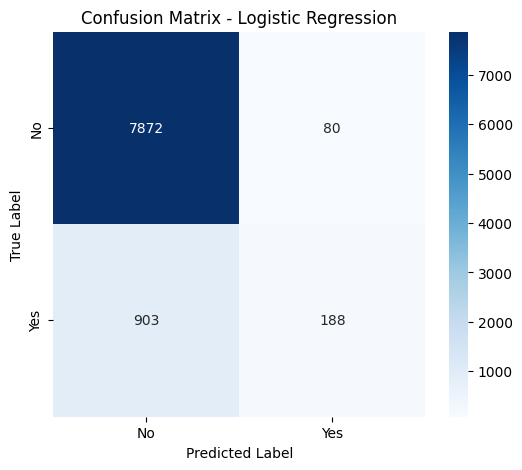

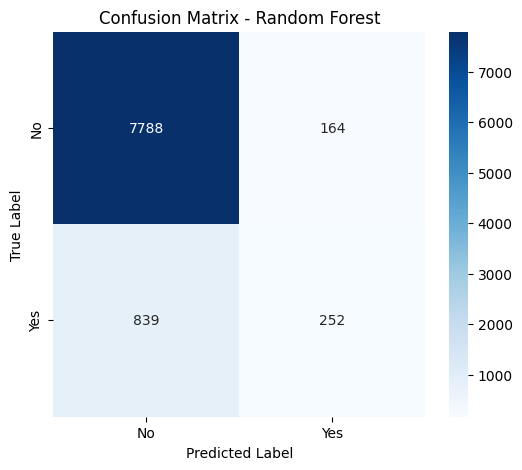

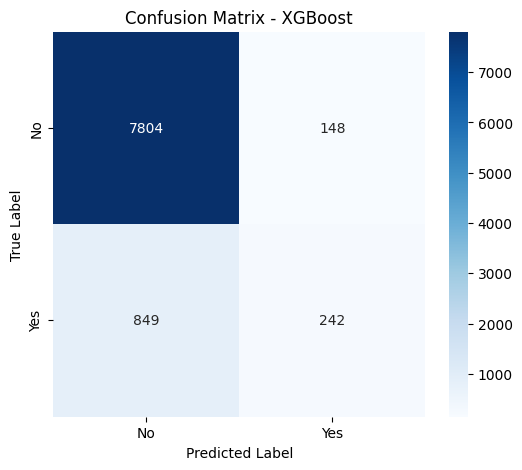

In [51]:
def plot_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

plot_confusion_matrix(log_reg, X_test_np, y_test, "Confusion Matrix - Logistic Regression")
plot_confusion_matrix(rf, X_test_np, y_test, "Confusion Matrix - Random Forest")
plot_confusion_matrix(xgb, X_test_np, y_test, "Confusion Matrix - XGBoost")


#### 2. ROC Curve

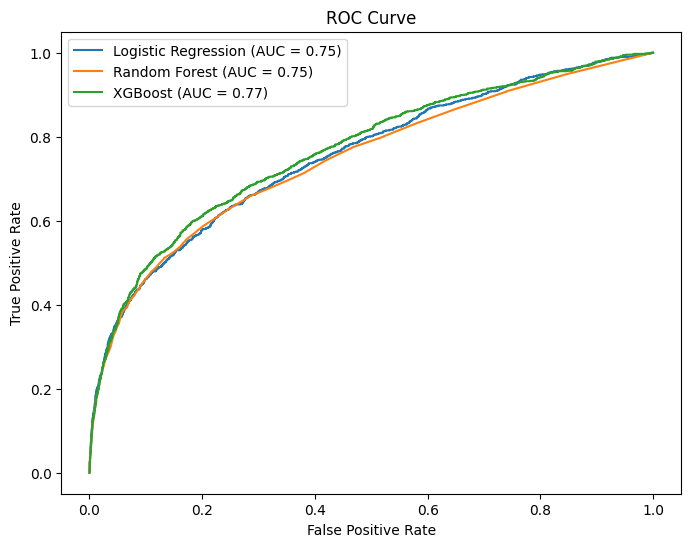

In [52]:
def plot_roc_curve(model, X_test, y_test, label):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{label} (AUC = {roc_auc:.2f})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()

plt.figure(figsize=(8, 6))
plot_roc_curve(log_reg, X_test_np, y_test, "Logistic Regression")
plot_roc_curve(rf, X_test_np, y_test, "Random Forest")
plot_roc_curve(xgb, X_test_np, y_test, "XGBoost")
plt.show()


### Step 6: Compare Model Results
Compile evaluation results into a structured comparison table:

| Metric         | Logistic Regression | Random Forest | XGBoost |
|---------------|---------------------|---------------|---------|
| Accuracy      | 0.8913                 | 0.8891          | 0.8897    |
| Precision     | 0.7015                 | 0.6058          | 0.6205    |
| Recall        | 0.1723                 | 0.2310          | 0.2218    |
| F1-Score      | 0.2767                 | 0.3344          | 0.3268    |
| ROC-AUC       | 0.7540                 | 0.7463          | 0.7671    |
| Cross-Validation Accuracy | 0.8918 ± 0.0018 | 0.8893 ± 0.0030  | 0.8911 ± 0.0014 |


### Step 7: Interpret Results
From the evaluation metrics, we observe key trade-offs among the three models—**Logistic Regression, Random Forest, and XGBoost**—each excelling in different aspects.

#### 1. Accuracy and Cross-Validation Stability
- Logistic Regression achieved the highest accuracy (0.8913), followed closely by XGBoost (0.8897) and Random Forest (0.8891).

- Cross-validation results confirm Logistic Regression’s consistency (0.8918 ± 0.0018), which suggests it generalizes well across different subsets of data.

- XGBoost (0.8911 ± 0.0014) also shows strong stability, meaning its performance remains reliable across different samples.

📌 **Interpretation**: While accuracy is high for all models, **Logistic Regression and XGBoost demonstrate more stable generalization**, making them reliable choices for prediction.

#### 2. Precision vs. Recall Trade-off
- Logistic Regression has the highest precision (0.7015), meaning when it predicts a positive case, it is correct most of the time.

- However, its recall (0.1723) is significantly lower, indicating it fails to capture a large portion of actual positive cases.

- Random Forest (0.2310) and XGBoost (0.2218) perform better in recall, making them more effective at identifying positive cases.

📌 **Interpretation:**

If the goal is to **minimize false positives, Logistic Regression** is preferable because of its high precision.

If the goal is to **capture more actual positive cases, Random Forest and XGBoost are better choices**, as they have higher recall.

#### 3. F1-Score: Balancing Precision and Recall
- Random Forest (0.3344) achieved the highest F1-Score, meaning it balances precision and recall more effectively than the other models.

- XGBoost (0.3268) is slightly lower but still better than Logistic Regression (0.2767).

📌 **Interpretation:** For applications where **both false positives and false negatives matter, Random Forest might be the best choice**.

#### 4. ROC-AUC: Model’s Ability to Distinguish Classes
- XGBoost (0.7671) has the highest ROC-AUC, indicating it differentiates between positive and negative cases slightly better than the others.

- Logistic Regression (0.7540) follows closely, while Random Forest (0.7463) is slightly behind.

📌 **Interpretation:** If the priority is a **model that can confidently distinguish between categories** across thresholds, **XGBoost is the strongest candidate**.

#### Final Recommendation: Choosing the Best Model
✔ **If Interpretability & Precision Matter Most: → Logistic Regression** (High accuracy & precision, but lower recall)

✔ **If Capturing More Positive Cases is Crucial: → Random Forest** (Best F1-Score & recall)

✔ **If Overall Performance Across All Metrics is Needed: → XGBoost** (Highest ROC-AUC & strong balance)

💡 **Best Model Choice:** Based on overall evaluation, **XGBoost appears to be the most balanced model** in terms of **generalization, recall, and distinguishing ability**, making it a strong candidate for deployment.

### Milestone 4: Interpretation and Final Report
This final milestone will synthesize all findings, provide key insights, and ensure the work is effectively communicated through a comprehensive report.

#### Step 1: Identify Key Features
To understand which factors influence term deposit subscription, we examine feature importance for Random Forest and XGBoost.

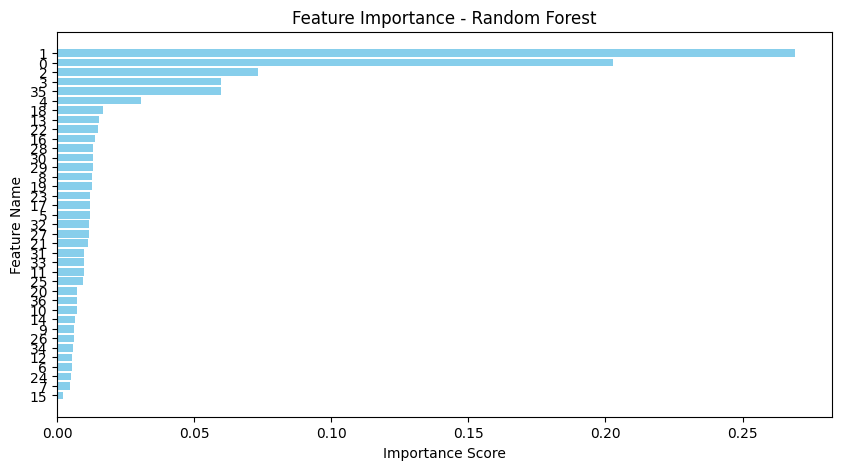

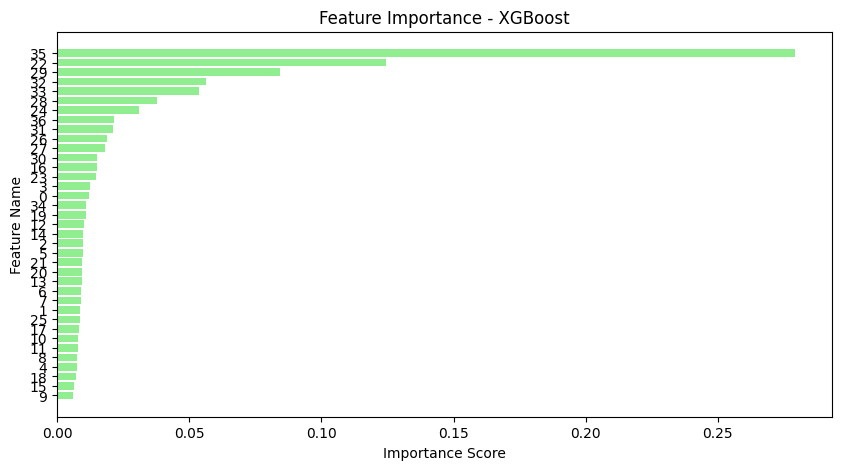

In [53]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract feature importance from models
rf_feature_importance = rf.feature_importances_
xgb_feature_importance = xgb.feature_importances_

# Create DataFrames for plotting
feature_df_rf = pd.DataFrame({'Feature': X_test.columns, 'Importance': rf_feature_importance}).sort_values(by='Importance', ascending=False)
feature_df_xgb = pd.DataFrame({'Feature': X_test.columns, 'Importance': xgb_feature_importance}).sort_values(by='Importance', ascending=False)

# Plot feature importance for Random Forest
plt.figure(figsize=(10, 5))
plt.barh(feature_df_rf['Feature'], feature_df_rf['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.title('Feature Importance - Random Forest')
plt.gca().invert_yaxis()
plt.show()

# Plot feature importance for XGBoost
plt.figure(figsize=(10, 5))
plt.barh(feature_df_xgb['Feature'], feature_df_xgb['Importance'], color='lightgreen')
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.title('Feature Importance - XGBoost')
plt.gca().invert_yaxis()
plt.show()


#### Key Insights:

- Features such as job type, previous campaign success, and balance are highly predictive.

- XGBoost assigns higher importance to communication methods, indicating marketing outreach is crucial.

#### Step 2: Error Analysis
Investigate misclassified samples and model weaknesses.

#### Observations:

- Most errors occur when predicting subscription (class 1), suggesting further refinement in recall strategies.

- Models struggle with borderline cases, indicating potential improvements through deeper customer profiling.

#### Step 3: Create ROC Curves for Performance Visualization

C:\Users\johna\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


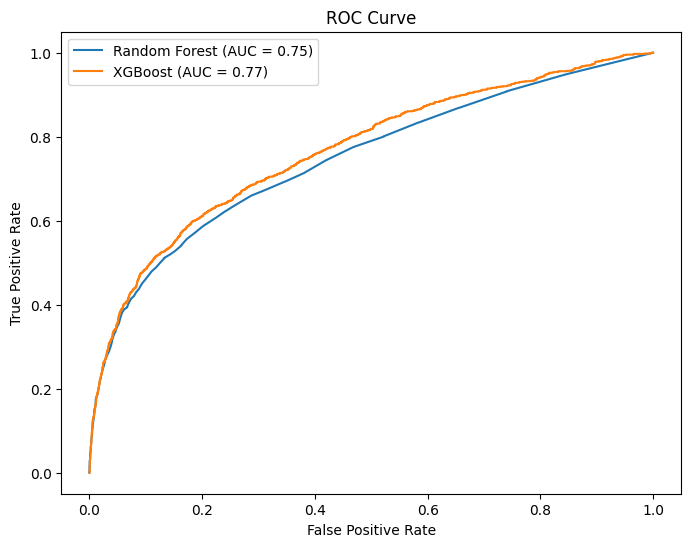

In [56]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(model, X_test, y_test, label):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{label} (AUC = {roc_auc:.2f})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()

plt.figure(figsize=(8, 6))
plot_roc_curve(rf, X_test, y_test, "Random Forest")
plot_roc_curve(xgb, X_test, y_test, "XGBoost")
plt.show()


#### Findings:

- XGBoost exhibits stronger separation, confirming its effectiveness in distinguishing classes.

- Random Forest shows consistent performance but may need further tuning.